# Data eda

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,order_id,create_time,good_id,price,utm_medium,utm_source,sessionkey_id,category_id,parent_id,root_id,model_id,is_moderated,rating_value,rating_count,description_length,goods_qty,pics_qty,model_create_time,is_callcenter
0,1269921,1975-12-26 09:30:08,9896348,753,5,8.0,123777004,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,1
1,1270034,1975-12-26 10:28:57,9896348,753,1,2.0,123781654,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,0
2,1268272,1975-12-25 11:24:28,9896348,753,2,3.0,123591002,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,1
3,1270544,1975-12-26 14:16:06,9896348,753,1,1.0,123832302,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,1
4,1270970,1975-12-26 18:21:47,9896348,753,3,56.0,123881603,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,0


## Dates

In [3]:
train_df['create_time'] = pd.to_datetime(train_df['create_time'])
train_df['model_create_time'] = pd.to_datetime(train_df['model_create_time'])

In [4]:
train_df['create_time_diff'] = (train_df['model_create_time'] - train_df['create_time']).dt.days

train_df['create_time_year'] = train_df['create_time'].dt.year
train_df['create_time_hour'] = train_df['create_time'].dt.hour

train_df['model_create_time_year'] = train_df['model_create_time'].dt.year
train_df['model_create_time_hour'] = train_df['model_create_time'].dt.hour

In [5]:
train_df['weekday'] = train_df['create_time'].dt.weekday

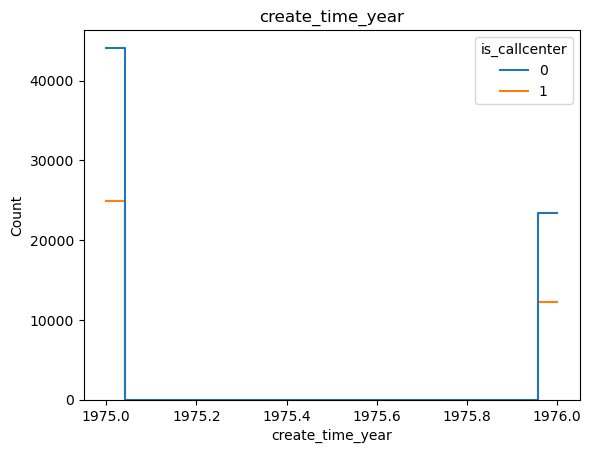

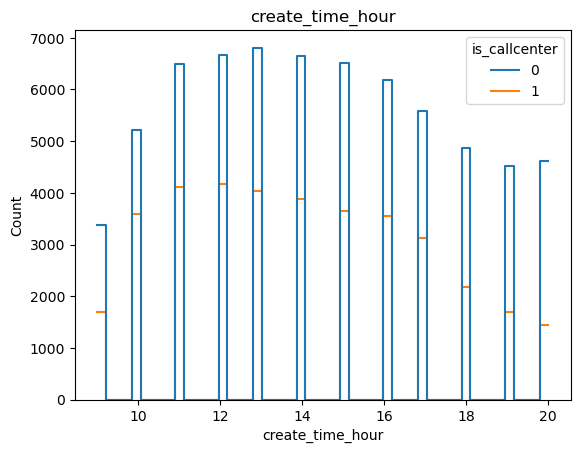

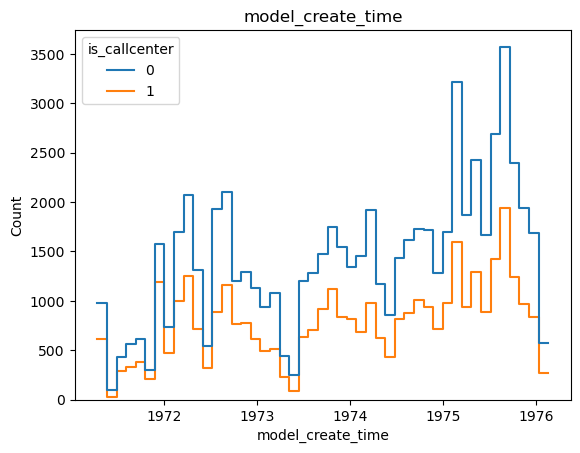

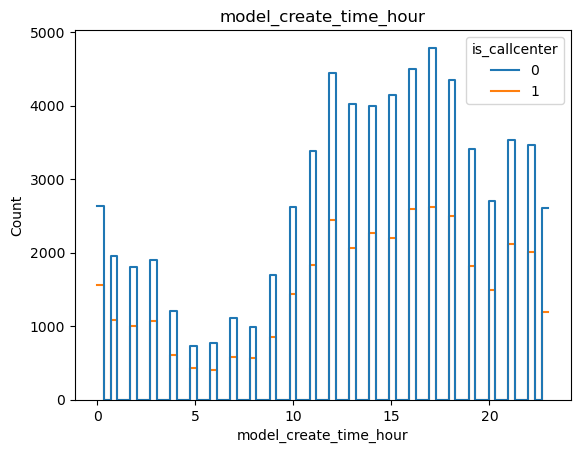

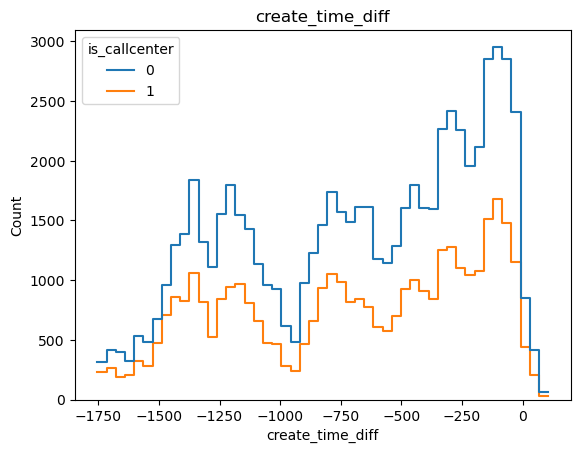

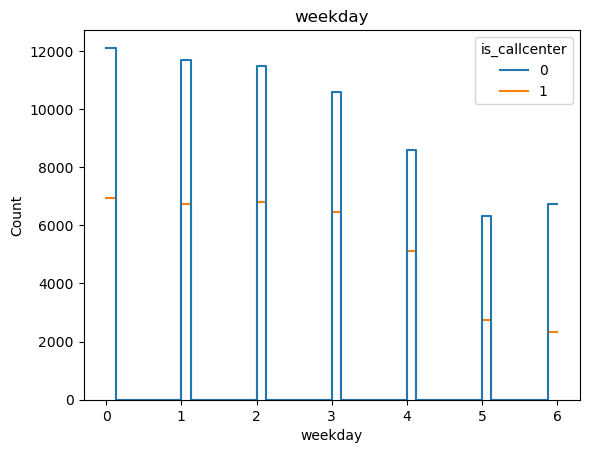

In [6]:
plt.title('create_time_year')
sns.histplot(data=train_df, x='create_time_year', hue='is_callcenter', element='step', fill=False)
plt.show()

plt.title('create_time_hour')
sns.histplot(data=train_df, x='create_time_hour', hue='is_callcenter', element='step', fill=False)
plt.show()

plt.title('model_create_time')
sns.histplot(data=train_df, x='model_create_time', hue='is_callcenter', element='step', fill=False)
plt.show()

plt.title('model_create_time_hour')
sns.histplot(data=train_df, x='model_create_time_hour', hue='is_callcenter', element='step', fill=False)
plt.show()

plt.title('create_time_diff')
sns.histplot(data=train_df, x='create_time_diff', hue='is_callcenter', element='step', fill=False)
plt.show()

plt.title('weekday')
sns.histplot(data=train_df, x='weekday', hue='is_callcenter', element='step', fill=False)
plt.show()

Независимо от дат, позвонивших примерно одинаковая доля от непозвонивиших 

## good_id

In [7]:
train_df.head()

,order_id,create_time,good_id,price,utm_medium,utm_source,sessionkey_id,category_id,parent_id,root_id,...,goods_qty,pics_qty,model_create_time,is_callcenter,create_time_diff,create_time_year,create_time_hour,model_create_time_year,model_create_time_hour,weekday
0,1269921,1975-12-26 09:30:08,9896348,753,5,8.0,123777004,139,133,124,...,6,2,1971-04-14 00:15:20,1,-1718.0,1975,9,1971.0,0.0,4
1,1270034,1975-12-26 10:28:57,9896348,753,1,2.0,123781654,139,133,124,...,6,2,1971-04-14 00:15:20,0,-1718.0,1975,10,1971.0,0.0,4
2,1268272,1975-12-25 11:24:28,9896348,753,2,3.0,123591002,139,133,124,...,6,2,1971-04-14 00:15:20,1,-1717.0,1975,11,1971.0,0.0,3
3,1270544,1975-12-26 14:16:06,9896348,753,1,1.0,123832302,139,133,124,...,6,2,1971-04-14 00:15:20,1,-1718.0,1975,14,1971.0,0.0,4
4,1270970,1975-12-26 18:21:47,9896348,753,3,56.0,123881603,139,133,124,...,6,2,1971-04-14 00:15:20,0,-1718.0,1975,18,1971.0,0.0,4


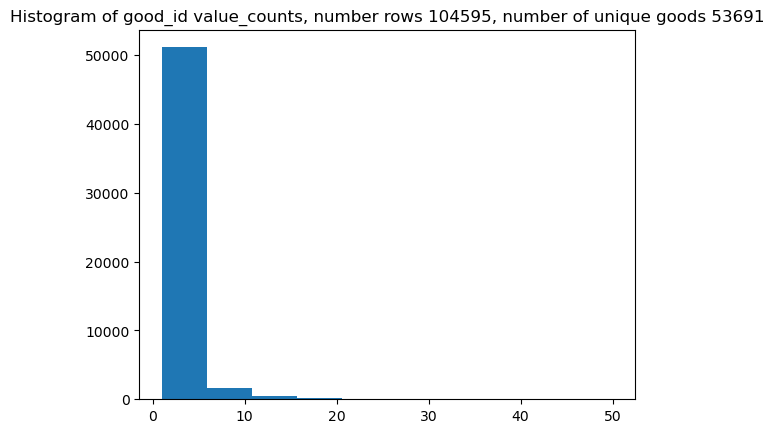

In [8]:
plt.title(
    'Histogram of good_id value_counts, ' +
    f'number rows {len(train_df)}, ' + 
    f"number of unique goods {train_df['good_id'].nunique()}"
)
plt.hist(train_df['good_id'].value_counts(), range=(1, 50))
plt.show()

## price 

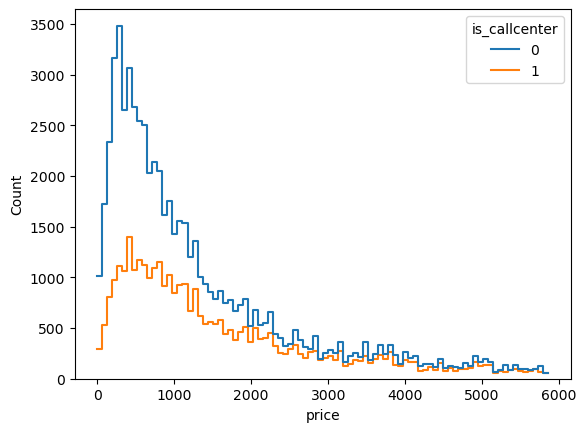

In [9]:
sns.histplot(
    data=train_df[train_df['price'] < train_df['price'].quantile(0.95)], 
    x='price', 
    hue='is_callcenter',
    element='step', 
    fill=False,
)
plt.show()

## utm_medium

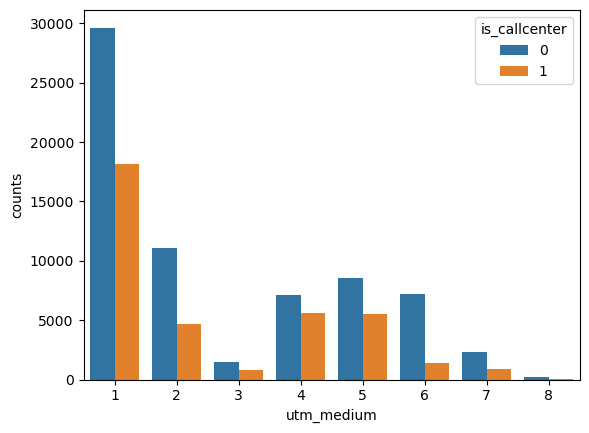

In [10]:
sns.barplot(
    train_df\
        .groupby(['utm_medium', 'is_callcenter'])\
        .size()\
        .to_frame()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='utm_medium',
    y='counts',
    hue='is_callcenter'
)
plt.show()


## utm_source

In [11]:
train_df['utm_source'] = train_df['utm_source'].astype(pd.Int64Dtype()).astype(str)

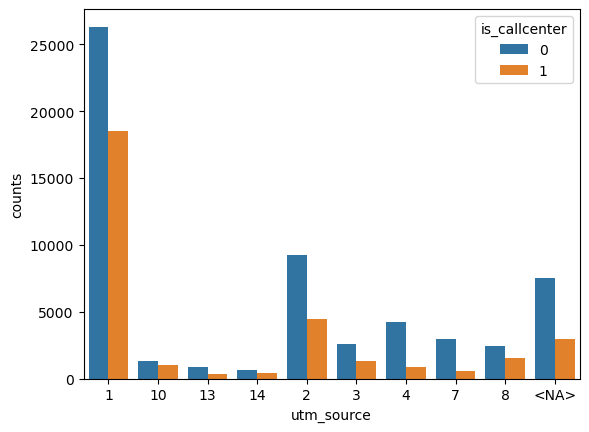

In [12]:
top_sources = train_df['utm_source'].value_counts().index[:10]
ids = train_df['utm_source'].isin(top_sources)

sns.barplot(
    train_df[ids]\
        .groupby(['utm_source', 'is_callcenter'])\
        .size()\
        .to_frame()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='utm_source',
    y='counts',
    hue='is_callcenter'
)
plt.show()


## sessionkey_id

In [13]:
train_df['sessionkey_id'].value_counts()

125996889    21
116065921    17
115530395    14
125861300    11
119684247    10
             ..
114311820     1
114432557     1
114365017     1
114614164     1
114672813     1
Name: sessionkey_id, Length: 96803, dtype: int64

In [14]:
train_df.groupby('sessionkey_id')['is_callcenter'].sum().max()

10

## category_id

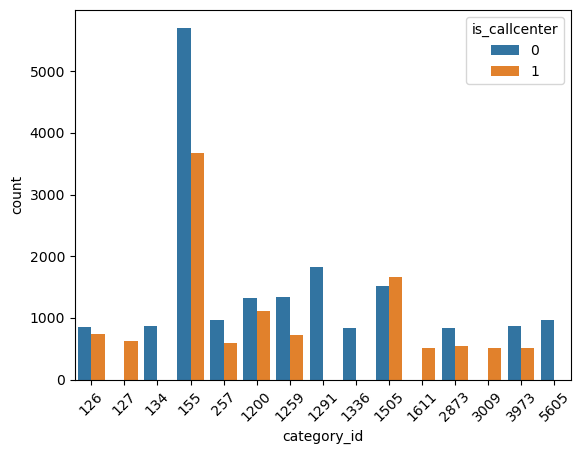

In [15]:
sns.barplot(
    data=train_df\
        .groupby(['category_id', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'count'})\
        .query('(count > 500 & is_callcenter == 1) | (count > 800 & is_callcenter == 0)'),
    x='category_id',
    y='count',
    hue='is_callcenter'
)

plt.xticks(rotation=45)
plt.show()

## parent_id

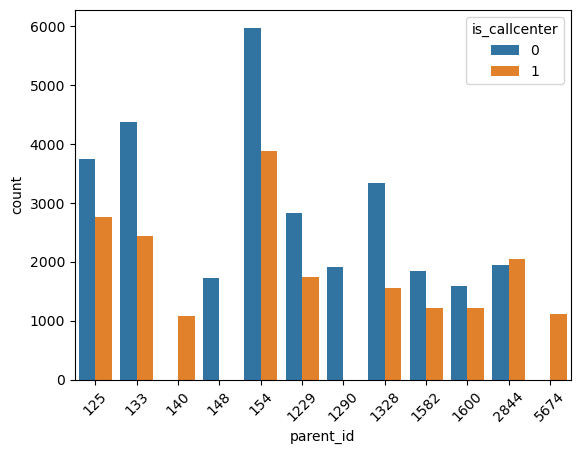

In [16]:
sns.barplot(
    data=train_df\
        .groupby(['parent_id', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'count'})\
        .query('(count > 1000 & is_callcenter == 1) | (count > 1500 & is_callcenter == 0)'),
    x='parent_id',
    y='count',
    hue='is_callcenter',

)

plt.xticks(rotation=45)
plt.show()

## root_id

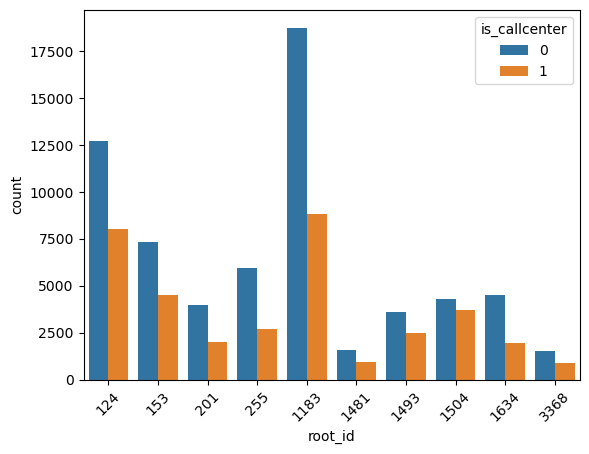

In [17]:
sns.barplot(
    data=train_df\
        .groupby(['root_id', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'count'})\
        .query('(count > 800 & is_callcenter == 1) | (count > 1500 & is_callcenter == 0)'),
    x='root_id',
    y='count',
    hue='is_callcenter',

)

plt.xticks(rotation=45)
plt.show()

## rating_value

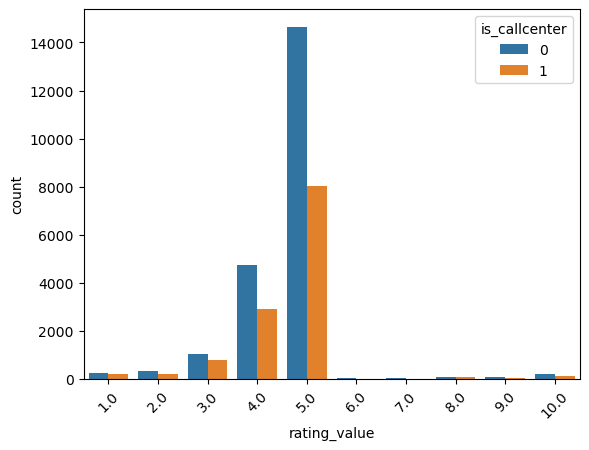

In [18]:
sns.barplot(
    data=train_df\
        .groupby(['rating_value', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'count'}),
    x='rating_value',
    y='count',
    hue='is_callcenter',
)

plt.xticks(rotation=45)
plt.show()

## rating_count

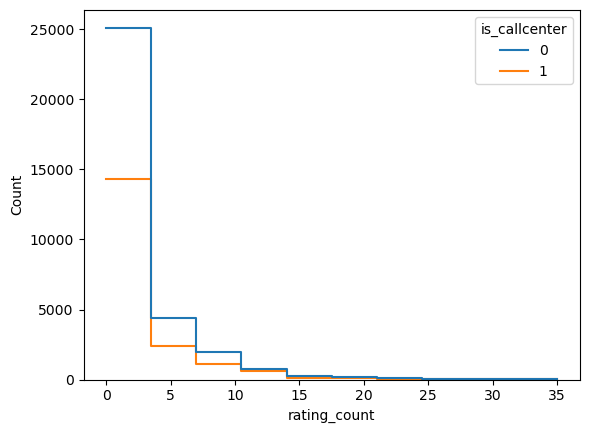

In [19]:
sns.histplot(
    data=train_df, 
    x='rating_count', 
    hue='is_callcenter', 
    element='step', 
    fill=False, 
    bins=10
)
plt.show()

## description_length

In [20]:
train_df['description_length'].replace(0, np.nan, inplace=True)

In [21]:
train_df['no_description'] = train_df['description_length'].isna()

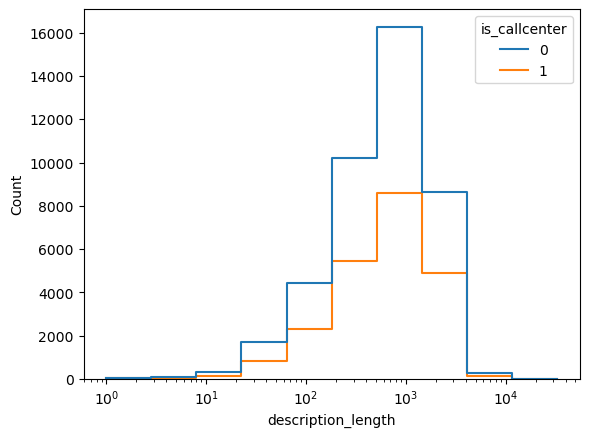

In [22]:
sns.histplot(
    data=train_df, 
    x='description_length', 
    hue='is_callcenter', 
    element='step', 
    fill=False, 
    bins=10,
    log_scale=True
)
plt.show()

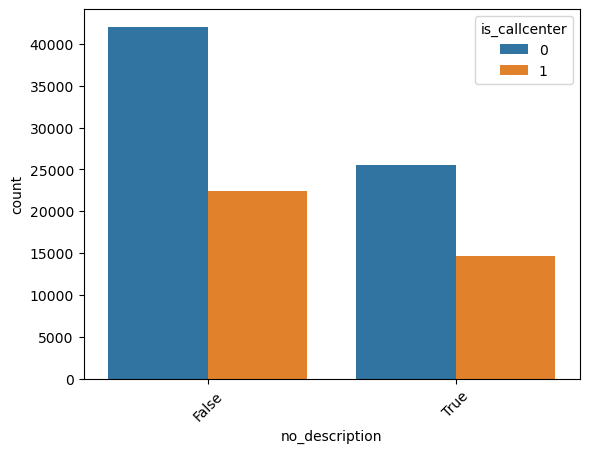

In [23]:
sns.barplot(
    data=train_df\
        .groupby(['no_description', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'count'}),
    x='no_description',
    y='count',
    hue='is_callcenter',
)

plt.xticks(rotation=45)
plt.show()

## goods_qty

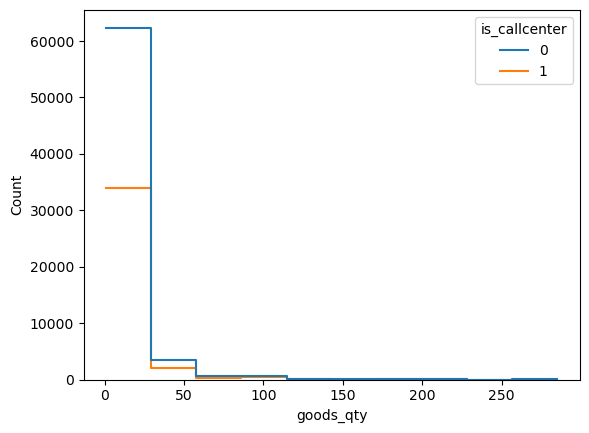

In [24]:
sns.histplot(
    data=train_df, 
    x='goods_qty', 
    hue='is_callcenter', 
    element='step', 
    fill=False, 
    bins=10,
)
plt.show()

## sessions dataframe

In [25]:
train_df.head()

,order_id,create_time,good_id,price,utm_medium,utm_source,sessionkey_id,category_id,parent_id,root_id,...,pics_qty,model_create_time,is_callcenter,create_time_diff,create_time_year,create_time_hour,model_create_time_year,model_create_time_hour,weekday,no_description
0,1269921,1975-12-26 09:30:08,9896348,753,5,8,123777004,139,133,124,...,2,1971-04-14 00:15:20,1,-1718.0,1975,9,1971.0,0.0,4,False
1,1270034,1975-12-26 10:28:57,9896348,753,1,2,123781654,139,133,124,...,2,1971-04-14 00:15:20,0,-1718.0,1975,10,1971.0,0.0,4,False
2,1268272,1975-12-25 11:24:28,9896348,753,2,3,123591002,139,133,124,...,2,1971-04-14 00:15:20,1,-1717.0,1975,11,1971.0,0.0,3,False
3,1270544,1975-12-26 14:16:06,9896348,753,1,1,123832302,139,133,124,...,2,1971-04-14 00:15:20,1,-1718.0,1975,14,1971.0,0.0,4,False
4,1270970,1975-12-26 18:21:47,9896348,753,3,56,123881603,139,133,124,...,2,1971-04-14 00:15:20,0,-1718.0,1975,18,1971.0,0.0,4,False


In [26]:
sessions_df = pd.read_csv('t1_webstat.csv')
sessions_df['date_time'] = pd.to_datetime(sessions_df['date_time'])
sessions_df.head()

,sessionkey_id,date_time,page_type,pageview_number,pageview_duration_sec,category_id,model_id,good_id,price,product_in_sale
0,122243978,1975-12-18 14:52:38.130,2,28,53.0,1773.0,NaN,NaN,NaN,NaN
1,122243978,1975-12-18 15:02:32.403,5,36,163.0,NaN,NaN,NaN,NaN,NaN
2,122243978,1975-12-18 15:08:11.147,5,40,156.0,NaN,NaN,NaN,NaN,NaN
3,122243992,1975-12-18 14:23:33.177,1,4,565.0,3973.0,26706175.0,45171119.0,8436.0,1.0
4,122243992,1975-12-18 14:32:58.763,1,5,73.0,3973.0,17297250.0,65195750.0,6624.0,1.0


In [27]:
sessions_df['date_time'] = pd.to_datetime(sessions_df['date_time'])
sessions_df['number_of_nans'] = sessions_df.isna().sum(axis=1)
sessions_df.sort_values(by='number_of_nans', inplace=True)
sessions_df.groupby(['sessionkey_id', 'date_time']).first()
sessions_df = sessions_df.add_prefix('session_').rename(columns={'session_sessionkey_id': 'sessionkey_id'})

### Latest session before order

In [28]:
order_session_df = train_df.merge(
    sessions_df.add_prefix('lb_').rename(columns={'lb_sessionkey_id': 'sessionkey_id'}), 
    on='sessionkey_id'
).query('create_time > lb_session_date_time').copy()

# TODO: fillna pageview duration sec
order_session_df['lb_sum_time'] = order_session_df.groupby('order_id')['lb_session_pageview_duration_sec'].transform(sum)
order_session_df['lb_pages_before'] = order_session_df.groupby('order_id')['lb_session_pageview_duration_sec'].transform(len)

In [29]:
order_session_df = order_session_df.merge(
    order_session_df\
        .groupby(['order_id', 'sessionkey_id', 'lb_session_page_type']).size().reset_index()\
        .rename(columns={0: 'page_type_count'})\
        .pivot(index=['order_id'], columns='lb_session_page_type', values='page_type_count')\
        .add_prefix('lb_session_bage_type_count_')\
        .reset_index()\
        .fillna(0),
    on='order_id',
)

In [30]:
ids = order_session_df['lb_session_date_time'] == order_session_df.groupby('order_id')['lb_session_date_time'].transform(max)
order_session_df = order_session_df[ids]

order_session_df['lb_order_session_seconds'] = (
    order_session_df['create_time'] - order_session_df['lb_session_date_time']
).dt.total_seconds()

order_session_df.loc[order_session_df['lb_sum_time'] < 0, 'lb_sum_time'] = np.nan

In [31]:
ids = order_session_df['create_time'].dt.date == order_session_df['lb_session_date_time'].dt.date
order_session_df = order_session_df[ids]

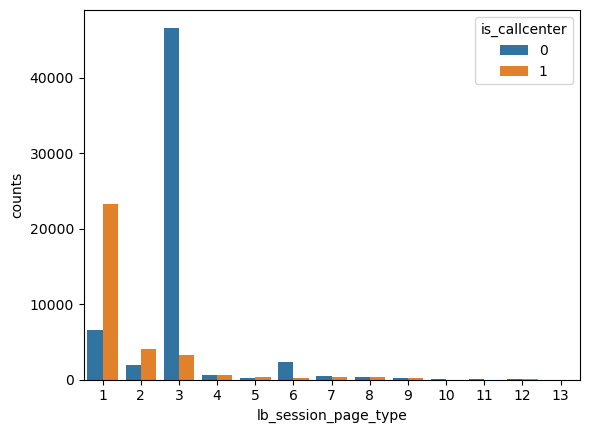

In [32]:
sns.barplot(
    data=order_session_df\
        .groupby(['lb_session_page_type', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='lb_session_page_type',
    y='counts',
    hue='is_callcenter',
)

plt.show()

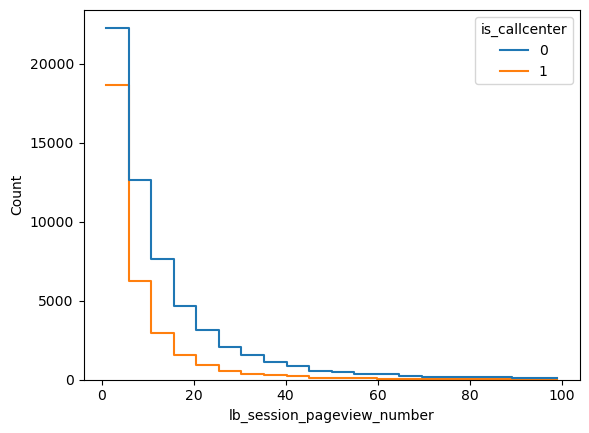

In [33]:
sns.histplot(
    data=order_session_df[order_session_df['lb_session_pageview_number'] < 100],
    x='lb_session_pageview_number',
    hue='is_callcenter',
    bins=20,
    element='step', 
    fill=False,
)
plt.show()

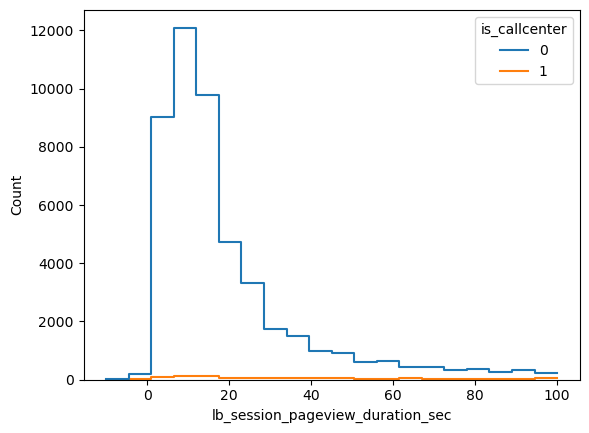

In [34]:
sns.histplot(
    data=order_session_df[order_session_df['lb_session_pageview_duration_sec'].between(-10, 100)],
    x='lb_session_pageview_duration_sec',
    hue='is_callcenter',
    bins=20,
    element='step', 
    fill=False,
)
plt.show()

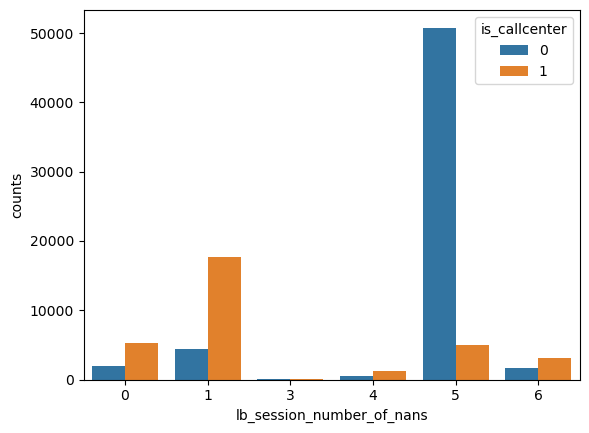

In [35]:
sns.barplot(
    data=order_session_df\
        .groupby(['lb_session_number_of_nans', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='lb_session_number_of_nans',
    y='counts',
    hue='is_callcenter',
)

plt.show()

Nice feature

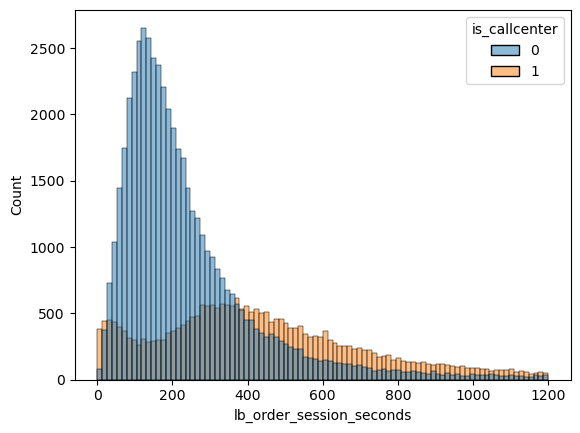

In [36]:
sns.histplot(
    data=order_session_df.query('lb_order_session_seconds < 1200'),
    x='lb_order_session_seconds',
    hue='is_callcenter',
)

plt.show()


Finally, some good feature

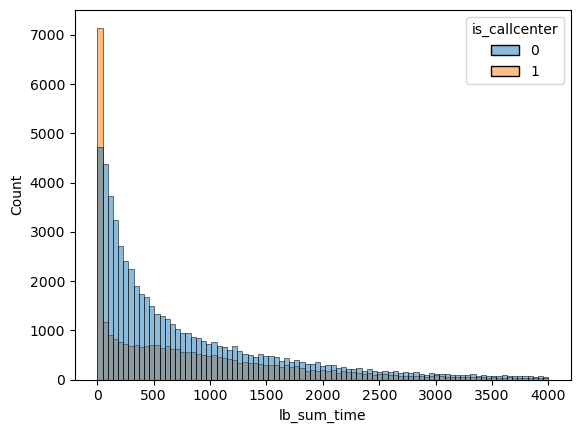

In [37]:
sns.histplot(
    data=order_session_df.query('lb_sum_time < 4000'),
    x='lb_sum_time',
    hue='is_callcenter',
)

plt.show()

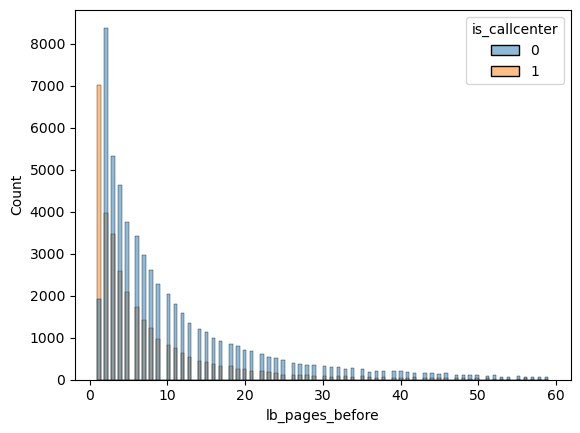

In [38]:
sns.histplot(
    data=order_session_df.query('lb_pages_before < 60'),
    x='lb_pages_before',
    hue='is_callcenter',
)

plt.show()

### First after

In [39]:
order_session_df = train_df.merge(
    sessions_df.add_prefix('fa_').rename(columns={'fa_sessionkey_id': 'sessionkey_id'}), 
    on='sessionkey_id'
).query('create_time < fa_session_date_time').copy()

# TODO: fillna pageview duration sec
order_session_df['fa_sum_time'] = order_session_df.groupby('order_id')['fa_session_pageview_duration_sec'].transform(sum)
order_session_df['fa_pages_before'] = order_session_df.groupby('order_id')['fa_session_pageview_duration_sec'].transform(len)

In [40]:
order_session_df = order_session_df.merge(
    order_session_df\
        .groupby(['order_id', 'sessionkey_id', 'fa_session_page_type']).size().reset_index()\
        .rename(columns={0: 'page_type_count'})\
        .pivot(index=['order_id'], columns='fa_session_page_type', values='page_type_count')\
        .add_prefix('fa_session_bage_type_count_')\
        .reset_index()\
        .fillna(0),
    on='order_id',
)

In [41]:
ids = order_session_df['fa_session_date_time'] == order_session_df.groupby('order_id')['fa_session_date_time'].transform(min)
order_session_df = order_session_df[ids]

order_session_df['fa_order_session_seconds'] = (
    order_session_df['fa_session_date_time'] - order_session_df['create_time']
).dt.total_seconds()

order_session_df.loc[order_session_df['fa_sum_time'] < 0, 'fa_sum_time'] = np.nan

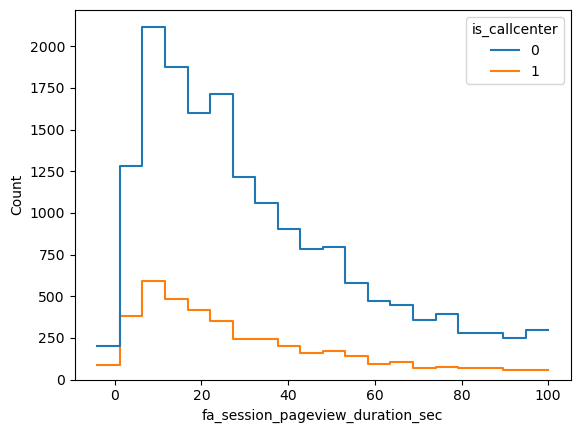

In [42]:
sns.histplot(
    data=order_session_df[order_session_df['fa_session_pageview_duration_sec'].between(-10, 100)],
    x='fa_session_pageview_duration_sec',
    hue='is_callcenter',
    bins=20,
    element='step', 
    fill=False,
)
plt.show()

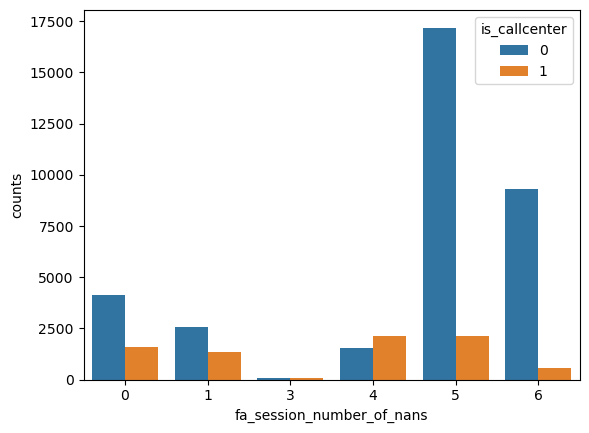

In [43]:
sns.barplot(
    data=order_session_df\
        .groupby(['fa_session_number_of_nans', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='fa_session_number_of_nans',
    y='counts',
    hue='is_callcenter',
)

plt.show()

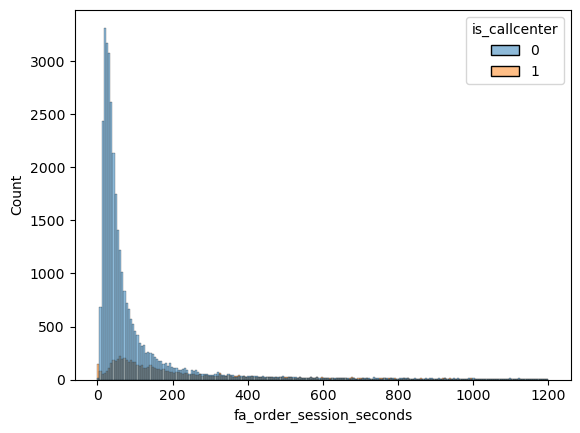

In [44]:
sns.histplot(
    data=order_session_df.query('fa_order_session_seconds < 1200'),
    x='fa_order_session_seconds',
    hue='is_callcenter',
)

plt.show()

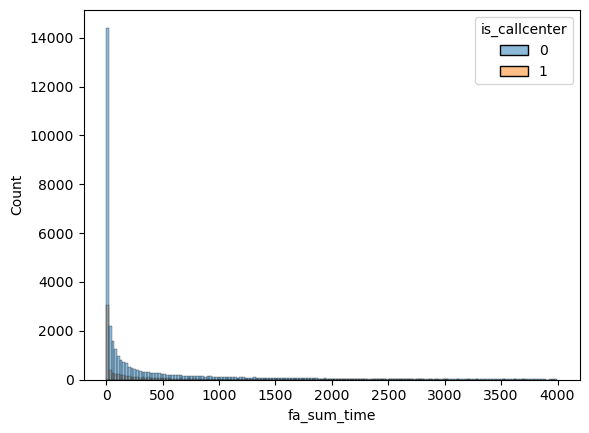

In [45]:
sns.histplot(
    data=order_session_df.query('fa_sum_time < 4000'),
    x='fa_sum_time',
    hue='is_callcenter',
)

plt.show()

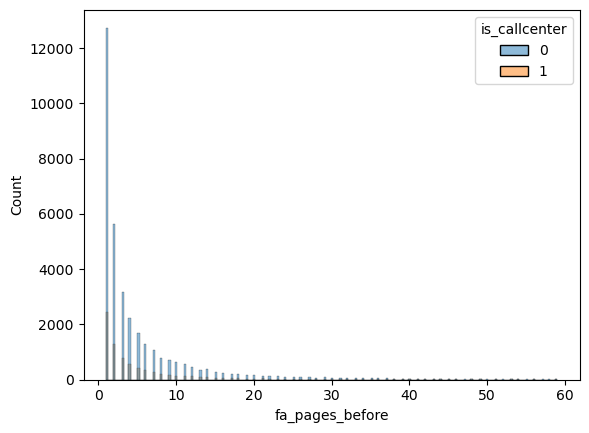

In [46]:
sns.histplot(
    data=order_session_df.query('fa_pages_before < 60'),
    x='fa_pages_before',
    hue='is_callcenter',
)

plt.show()

# Data engineering

In [47]:
def engineering(order, session):
    order['create_time'] = pd.to_datetime(order['create_time'])
    order['model_create_time'] = pd.to_datetime(order['model_create_time'])

    order['create_time_diff'] = (order['model_create_time'] - order['create_time']).dt.days

    order['create_time_year'] = order['create_time'].dt.year
    order['create_time_hour'] = order['create_time'].dt.hour

    order['weekday'] = order['create_time'].dt.weekday

    order['model_create_time_year'] = order['model_create_time'].dt.year
    order['model_create_time_hour'] = order['model_create_time'].dt.hour

    order['utm_source'] = order['utm_source'].astype(pd.Int64Dtype())
    order['description_length'].replace(0, np.nan, inplace=True)
    order['no_description'] = order['description_length'].isna()

    order.loc[order['rating_value'] > 5, 'rating_value'] /= 2

    session['date_time'] = pd.to_datetime(session['date_time'])
    session['number_of_nans'] = session.isna().sum(axis=1)
    session.sort_values(by='number_of_nans', inplace=True)
    session.groupby(['sessionkey_id', 'date_time']).first()
    session = session.add_prefix('session_').rename(columns={'session_sessionkey_id': 'sessionkey_id'})

    order_session = order.merge(
        session.add_prefix('lb_').rename(columns={'lb_sessionkey_id': 'sessionkey_id'}), 
        on='sessionkey_id'
    ).query('create_time > lb_session_date_time').copy()

    # TODO: fillna pageview duration sec
    order_session['lb_session_pageview_duration_sec'].fillna(order_session['lb_session_pageview_duration_sec'].median())
    order_session['lb_sum_time'] = order_session.groupby('order_id')['lb_session_pageview_duration_sec'].transform(sum)
    order_session['lb_pages'] = order_session.groupby('order_id')['lb_session_pageview_duration_sec'].transform(len)

    order_session = order_session.merge(
        order_session\
            .groupby(['order_id', 'sessionkey_id', 'lb_session_page_type']).size().reset_index()\
            .rename(columns={0: 'page_type_count'})\
            .pivot(index=['order_id'], columns='lb_session_page_type', values='page_type_count')\
            .add_prefix('lb_session_bage_type_count_')\
            .reset_index()\
            .fillna(0),
        on='order_id',
    )

    ids = order_session['lb_session_date_time'] == order_session.groupby('order_id')['lb_session_date_time'].transform(max)
    order_session = order_session[ids]
    order_session = order_session.groupby(['sessionkey_id', 'lb_session_date_time']).first().reset_index()

    order_session['lb_order_session_seconds'] = (
        order_session['create_time'] - order_session['lb_session_date_time']
    ).dt.total_seconds()

    order_session.loc[order_session['lb_sum_time'] < 0, 'lb_sum_time'] = np.nan
    order_session = order_session[order_session['lb_session_date_time'].dt.date == order_session['create_time'].dt.date]

    order = order.merge(order_session.drop(order.columns[1:], axis=1), on='order_id', how='left')

    order_session = order.merge(
        session.add_prefix('fa_').rename(columns={'fa_sessionkey_id': 'sessionkey_id'}), 
        on='sessionkey_id'
    ).query('create_time < fa_session_date_time').copy()

    # TODO: fillna pageview duration sec
    order_session['fa_session_pageview_duration_sec'].fillna(order_session['fa_session_pageview_duration_sec'].median())
    order_session['fa_sum_time'] = order_session.groupby('order_id')['fa_session_pageview_duration_sec'].transform(sum)
    order_session['fa_pages'] = order_session.groupby('order_id')['fa_session_pageview_duration_sec'].transform(len)

    order_session = order_session.merge(
        order_session\
            .groupby(['order_id', 'sessionkey_id', 'fa_session_page_type']).size().reset_index()\
            .rename(columns={0: 'page_type_count'})\
            .pivot(index=['order_id'], columns='fa_session_page_type', values='page_type_count')\
            .add_prefix('fa_session_bage_type_count_')\
            .reset_index()\
            .fillna(0),
        on='order_id',
    )

    ids = order_session['fa_session_date_time'] == order_session.groupby('order_id')['fa_session_date_time'].transform(min)
    order_session = order_session[ids]
    order_session = order_session.groupby(['sessionkey_id', 'fa_session_date_time']).first().reset_index()

    order_session['fa_order_session_seconds'] = (
        order_session['fa_session_date_time'] - order_session_df['create_time']
    ).dt.total_seconds()

    order_session.loc[order_session['fa_sum_time'] < 0, 'fa_sum_time'] = np.nan


    order = order.merge(order_session.drop(order.columns[1:], axis=1), on='order_id', how='left')

    order['lb_price_diff'] = order['lb_session_price'] - order['price']
    order['fa_price_diff'] = order['fa_session_price'] - order['price']

    # FIXES
    order.loc[order['lb_session_pageview_duration_sec'] < 0, 'lb_session_pageview_duration_sec'] = np.nan
    order.loc[order['fa_session_pageview_duration_sec'] < 0, 'fa_session_pageview_duration_sec'] = np.nan

    return order

In [48]:
train_df = pd.read_csv('train.csv')
sessions_df = pd.read_csv('t1_webstat.csv')

new_train = engineering(train_df, sessions_df)

In [49]:
# new_train = new_train[new_train['sessionkey_id'].isin(sessions_df['sessionkey_id'])]

In [50]:
new_train.head()

,order_id,create_time,good_id,price,utm_medium,utm_source,sessionkey_id,category_id,parent_id,root_id,...,fa_session_bage_type_count_7,fa_session_bage_type_count_8,fa_session_bage_type_count_9,fa_session_bage_type_count_10,fa_session_bage_type_count_11,fa_session_bage_type_count_12,fa_session_bage_type_count_13,fa_order_session_seconds,lb_price_diff,fa_price_diff
0,1269921,1975-12-26 09:30:08,9896348,753,5,8,123777004,139,133,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1270034,1975-12-26 10:28:57,9896348,753,1,2,123781654,139,133,124,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1268272,1975-12-25 11:24:28,9896348,753,2,3,123591002,139,133,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,1270544,1975-12-26 14:16:06,9896348,753,1,1,123832302,139,133,124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1270970,1975-12-26 18:21:47,9896348,753,3,56,123881603,139,133,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Train Test split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
new_train.columns

Index(['order_id', 'create_time', 'good_id', 'price', 'utm_medium',
       'utm_source', 'sessionkey_id', 'category_id', 'parent_id', 'root_id',
       'model_id', 'is_moderated', 'rating_value', 'rating_count',
       'description_length', 'goods_qty', 'pics_qty', 'model_create_time',
       'is_callcenter', 'create_time_diff', 'create_time_year',
       'create_time_hour', 'weekday', 'model_create_time_year',
       'model_create_time_hour', 'no_description', 'lb_session_date_time',
       'lb_session_page_type', 'lb_session_pageview_number',
       'lb_session_pageview_duration_sec', 'lb_session_category_id',
       'lb_session_model_id', 'lb_session_good_id', 'lb_session_price',
       'lb_session_product_in_sale', 'lb_session_number_of_nans',
       'lb_sum_time', 'lb_pages', 'lb_session_bage_type_count_1',
       'lb_session_bage_type_count_2', 'lb_session_bage_type_count_3',
       'lb_session_bage_type_count_4', 'lb_session_bage_type_count_5',
       'lb_session_bage_type_count

In [173]:
cat_features = [
    'good_id',
    'utm_medium',
    'utm_source',
    'category_id',
    'parent_id',
    'model_id',
    'is_moderated',
    'create_time_year',
    'weekday',
    'model_create_time_year',
    'model_create_time_hour',
    'no_description',
    'lb_session_page_type',
    'lb_session_category_id',
    'lb_session_product_in_sale',
    'lb_session_number_of_nans',
    'fa_session_page_type',
    'fa_session_category_id',
    'fa_session_model_id',
    'fa_session_good_id',
]

num_features = [
    'price',
    'rating_value',
    'rating_count',
    'description_length',
    'goods_qty',
    'pics_qty',
    'create_time_diff',
    'create_time_hour',
    'lb_session_pageview_number',
    'lb_session_pageview_duration_sec',
    'lb_session_price',
    'lb_sum_time',
    'lb_pages',
    'lb_order_session_seconds',
    'fa_session_pageview_number',
    'fa_session_pageview_duration_sec',
    'fa_session_price',
    'fa_sum_time',
    'fa_pages',
    'fa_order_session_seconds',
    'lb_price_diff',
    'fa_price_diff',
    'lb_session_bage_type_count_1',
    'lb_session_bage_type_count_2',
    'lb_session_bage_type_count_3',
    'lb_session_bage_type_count_4',
    'lb_session_bage_type_count_5',
    'lb_session_bage_type_count_6',
    'lb_session_bage_type_count_7',
    'lb_session_bage_type_count_8',
    'lb_session_bage_type_count_9',
    'lb_session_bage_type_count_10',
    'lb_session_bage_type_count_11',
    'lb_session_bage_type_count_12',
    'lb_session_bage_type_count_13',
    'fa_session_bage_type_count_1',
    'fa_session_bage_type_count_2',
    'fa_session_bage_type_count_3',
    'fa_session_bage_type_count_4',
    'fa_session_bage_type_count_5',
    'fa_session_bage_type_count_6',
    'fa_session_bage_type_count_7',
    'fa_session_bage_type_count_8',
    'fa_session_bage_type_count_9',
    'fa_session_bage_type_count_10',
    'fa_session_bage_type_count_11',
    'fa_session_bage_type_count_12',
    'fa_session_bage_type_count_13',
]

In [174]:
ids = ~new_train['lb_order_session_seconds'].isna()

X_train, X_test, y_train, y_test = train_test_split(
    new_train.loc[ids, num_features + cat_features], 
    new_train.loc[ids, 'is_callcenter'],
    train_size=0.7,
    random_state=17,
    shuffle=True
)

# Model

In [175]:
from sklearn.model_selection import KFold

In [176]:
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

In [177]:
num_imputer = SimpleImputer(strategy='median')
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

In [178]:
X_train[cat_features] = X_train[cat_features].astype(pd.Int64Dtype()).astype(str)
X_test[cat_features] = X_test[cat_features].astype(pd.Int64Dtype()).astype(str)

In [179]:
params = {
    'iterations': 700,
    'learning_rate': 0.12,
    'depth': 6,
    'l2_leaf_reg': 24,
    'loss_function': 'CrossEntropy',
    'bootstrap_type': 'No',
    'grow_policy': 'SymmetricTree',
    'min_data_in_leaf': 238,
    'cat_features': cat_features,
}

model = CatBoostClassifier(
    **params
)

model.fit(
    X_train, 
    y_train, 
    cat_features=cat_features,
    eval_set=[(X_test, y_test)],
    verbose=False,
)

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [180]:
0.9886785525781323

0.9886785525781323

In [181]:
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.9889897197049944

In [182]:
model.best_iteration_

697

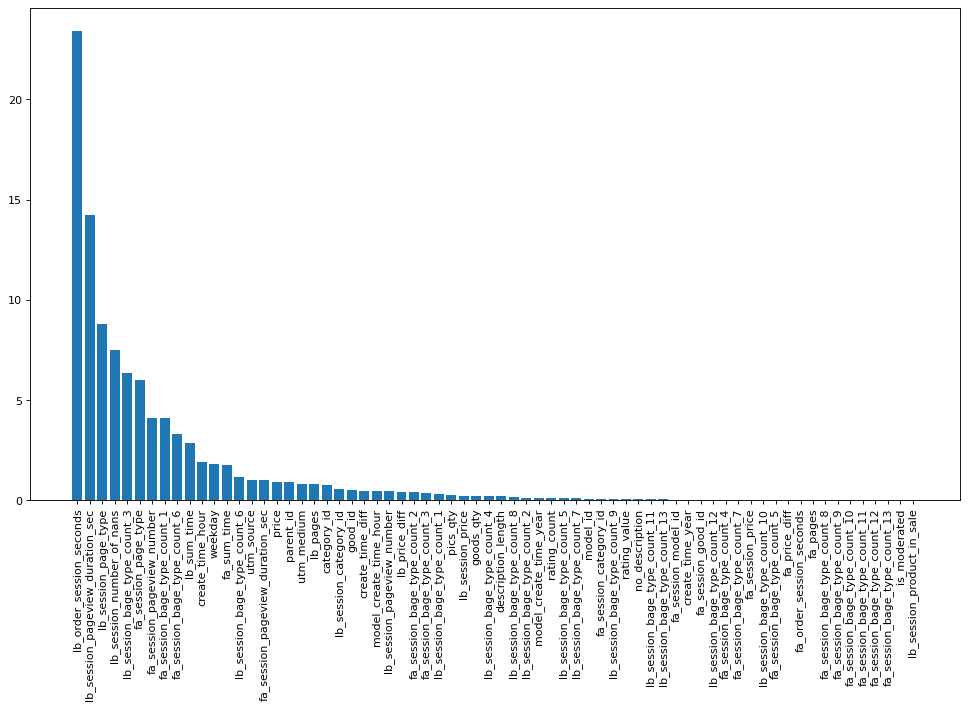

In [183]:
feature_importance = model.get_feature_importance()
argsort = np.argsort(feature_importance)[::-1]
feature_importance = feature_importance[argsort]
columns = X_train.columns[argsort]

plt.figure(figsize=(15, 8), dpi=80)
plt.bar(height=feature_importance, x=columns)
plt.xticks(rotation=90)
plt.show()

In [184]:
def k_fold_predict(model, train, num_features, cat_features, target, train_ids=None, n_splits=5):
    if train_ids is None:
        train_ids = np.ones(len(train), dtype=bool)
    
    kf = KFold(n_splits=n_splits)
    predicted = np.zeros(len(train)) - 1.0
    train = train.copy()

    null_cells = train[cat_features].isnull()
    train[cat_features] = train[cat_features].astype(str).mask(null_cells, np.NaN)

    for train_index, test_index in kf.split(train):
        X_train = train.iloc[train_index][num_features + cat_features]
        y_train = train.iloc[train_index][target]

        X_test = train.iloc[test_index][num_features + cat_features]
        y_test = train.iloc[test_index][target]

        num_imputer = SimpleImputer(strategy='median')
        X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
        X_test[num_features] = num_imputer.transform(X_test[num_features])

        cat_imputer = SimpleImputer(strategy='most_frequent')
        X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
        X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

        model.fit(
            X_train, 
            y_train, 
            eval_set=[(X_test, y_test)],
            cat_features=cat_features,
            verbose=False,
        )

        predicted[test_index] = model.predict_proba(X_test)[:, 1]

    train['predicted'] = predicted
    return train

In [185]:
model = CatBoostClassifier(
    eval_metric='AUC', 
    use_best_model=True,
    task_type="GPU",
    devices='0:1'
)

good_ids = ~new_train['lb_order_session_seconds'].isna()
good_new_train = k_fold_predict(model, new_train[good_ids], num_features, cat_features, 'is_callcenter', 4)

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
Default metric period is 5 because AUC is/are not implemented for GPU
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
Default metric period is 5 because AUC is/are not implemented for GPU
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_featu

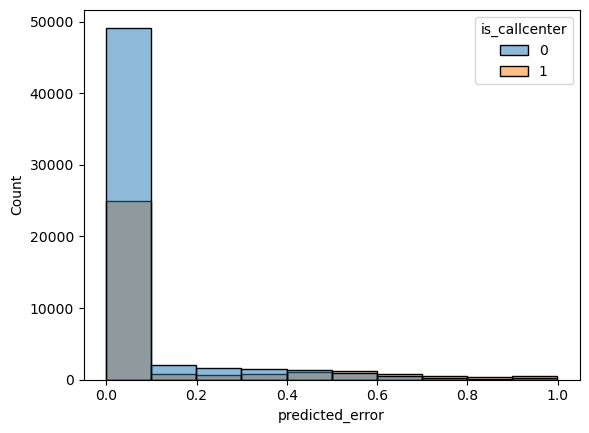

In [186]:
good_new_train['predicted_error'] = (good_new_train['predicted'] - good_new_train['is_callcenter']).abs()
sns.histplot(data=good_new_train, x='predicted_error', hue='is_callcenter', bins=10)
plt.show()

### Bad ids

In [187]:
new_train[~good_ids]['is_callcenter'].value_counts()

0    9997
1    5724
Name: is_callcenter, dtype: int64

In [188]:
# bad_train_columns = new_train.columns[~new_train[~good_ids].isna().all(axis=0)]
bad_train_columns = [c for c in new_train.columns if 'session' not in c and 'lb_' not in c and 'fa_' not in c]

In [189]:
bad_num_features = [n for n in num_features if n in bad_train_columns]
bad_cat_features = [c for c in cat_features if c in bad_train_columns]

In [190]:
bad_X_train, bad_X_test, bad_y_train, bad_y_test = train_test_split(
    new_train[bad_num_features + bad_cat_features], 
    new_train['is_callcenter'],
    train_size=0.7,
    random_state=17,
    shuffle=True
)

num_imputer = SimpleImputer(strategy='median')
bad_X_train[bad_num_features] = num_imputer.fit_transform(bad_X_train[bad_num_features])
bad_X_test[bad_num_features] = num_imputer.transform(bad_X_test[bad_num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
bad_X_train[bad_cat_features] = cat_imputer.fit_transform(bad_X_train[bad_cat_features])
bad_X_test[bad_cat_features] = cat_imputer.transform(bad_X_test[bad_cat_features])
bad_X_train[bad_cat_features] = bad_X_train[bad_cat_features].astype(pd.Int64Dtype()).astype(str)
bad_X_test[bad_cat_features] = bad_X_test[bad_cat_features].astype(pd.Int64Dtype()).astype(str)

In [191]:
model = CatBoostClassifier(
    eval_metric='AUC', 
    use_best_model=True,
    task_type="GPU",
    devices='0:1'
)

model.fit(
    bad_X_train, 
    bad_y_train, 
    cat_features=bad_cat_features,
    eval_set=[(bad_X_test, bad_y_test)],
    verbose=False,
)

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
Default metric period is 5 because AUC is/are not implemented for GPU


In [192]:
model.best_iteration_

735

In [193]:
bad_y_pred = model.predict_proba(bad_X_test)[:, 1]
roc_auc_score(bad_y_test, bad_y_pred)

0.6720933176629983

In [194]:
model = CatBoostClassifier(
    eval_metric='AUC', 
    use_best_model=True,
    task_type="GPU",
    devices='0:1'
)

bad_new_train = k_fold_predict(model, new_train, bad_num_features, bad_cat_features, 'is_callcenter', 4)

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
Default metric period is 5 because AUC is/are not implemented for GPU
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
Default metric period is 5 because AUC is/are not implemented for GPU
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_featu

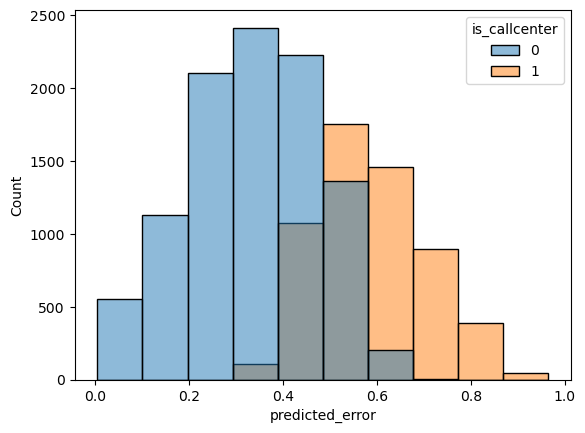

In [195]:
bad_new_train['predicted_error'] = (bad_new_train['predicted'] - bad_new_train['is_callcenter']).abs()
sns.histplot(data=bad_new_train[~good_ids], x='predicted_error', hue='is_callcenter', bins=10)
plt.show()

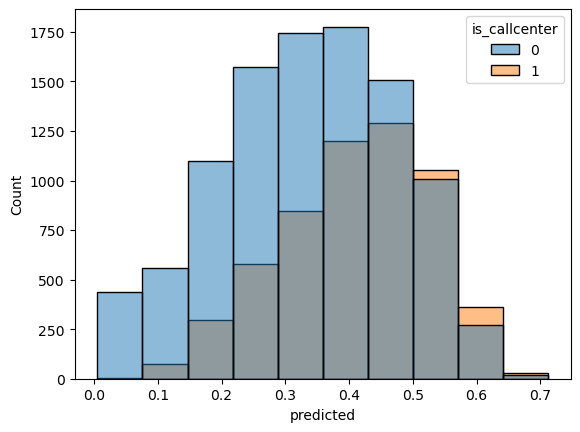

In [196]:
sns.histplot(data=bad_new_train[~good_ids], x='predicted', hue='is_callcenter', bins=10)
plt.show()

In [197]:
roc_auc_score(bad_new_train.loc[~good_ids, 'is_callcenter'], bad_new_train.loc[~good_ids, 'predicted'])

0.655375342511908

# Make simple prediction

In [198]:
test_df = pd.read_csv('test.csv')
new_test = engineering(test_df, sessions_df)

In [199]:
ids = ~new_test['lb_order_session_seconds'].isna()
good_test = new_test[ids]
bad_test = new_test[~ids]

In [200]:
good_train = new_train.loc[good_ids, num_features + cat_features]
good_y = new_train.loc[good_ids, 'is_callcenter']

In [201]:
bad_train = new_train.loc[~good_ids, bad_num_features + bad_cat_features]
bad_y = new_train.loc[~good_ids, 'is_callcenter']

In [202]:
new_test['is_callcenter'] = -1

In [203]:
good_num_imputer = SimpleImputer(strategy='mean')
good_train.loc[:,num_features] = good_num_imputer.fit_transform(good_train[num_features])
good_test.loc[:,num_features] = good_num_imputer.transform(good_test[num_features])

good_cat_imputer = SimpleImputer(strategy='most_frequent')
good_train.loc[:, cat_features] = good_cat_imputer.fit_transform(good_train[cat_features])
good_test.loc[:, cat_features] = good_cat_imputer.transform(good_test[cat_features])

good_train[cat_features] = good_train[cat_features].astype(int)
good_test[cat_features] = good_test[cat_features].astype(int)

/tmp/ipykernel_1856/541517292.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  good_train.loc[:,num_features] = good_num_imputer.fit_transform(good_train[num_features])
/tmp/ipykernel_1856/541517292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_test.loc[:,num_features] = good_num_imputer.transform(good_test[num_features])
/tmp/ipykernel_1856/541517292.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain 

In [204]:
params = {
    'iterations': 697,
    'learning_rate': 0.12004667398303634,
    'depth': 6,
    'l2_leaf_reg': 96.051581694114,
    'bootstrap_type': 'No',
    'grow_policy': 'Depthwise',
    'min_data_in_leaf': 27,
    'auto_class_weights': 'Balanced',
    'cat_features': cat_features,
}

good_model = CatBoostClassifier(**params)

good_model.fit(
    good_train, 
    good_y, 
    cat_features=cat_features,
    verbose=False,
)

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [205]:
new_test.loc[ids, 'is_callcenter'] = good_model.predict_proba(good_test[num_features + cat_features])[:, 1]

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [206]:
bad_num_imputer = SimpleImputer(strategy='mean')
bad_train.loc[:,bad_num_features] = bad_num_imputer.fit_transform(bad_train[bad_num_features])
bad_test.loc[:,bad_num_features] = bad_num_imputer.transform(bad_test[bad_num_features])

bad_cat_imputer = SimpleImputer(strategy='most_frequent')
bad_train.loc[:, bad_cat_features] = bad_cat_imputer.fit_transform(bad_train[bad_cat_features])
bad_test.loc[:, bad_cat_features] = bad_cat_imputer.transform(bad_test[bad_cat_features])

bad_train[bad_cat_features] = bad_train[bad_cat_features].astype(int)
bad_test[bad_cat_features] = bad_test[bad_cat_features].astype(int)

/tmp/ipykernel_1856/24574694.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bad_train.loc[:,bad_num_features] = bad_num_imputer.fit_transform(bad_train[bad_num_features])
/tmp/ipykernel_1856/24574694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_test.loc[:,bad_num_features] = bad_num_imputer.transform(bad_test[bad_num_features])
/tmp/ipykernel_1856/24574694.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To 

In [207]:
params = {
    'iterations': 825,
    'learning_rate': 0.12004667398303634,
    'depth': 6,
    'l2_leaf_reg': 96.051581694114,
    'bootstrap_type': 'No',
    'grow_policy': 'Depthwise',
    'min_data_in_leaf': 27,
    'auto_class_weights': 'Balanced',
    'cat_features': bad_cat_features,
}

bad_model = CatBoostClassifier(**params)

bad_model.fit(
    bad_train,
    bad_y, 
    cat_features=bad_cat_features,
    verbose=False,
)

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [208]:
new_test.loc[~ids, 'is_callcenter'] = bad_model.predict_proba(bad_test[bad_num_features + bad_cat_features])[:, 1]

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [209]:
new_test[['order_id', 'is_callcenter']].to_csv('sub_2models_opt.csv', index=None)

# Filter

In [211]:
good_new_train = k_fold_predict(model, new_train[good_ids], num_features, cat_features, 'is_callcenter', 4)
bad_new_train = k_fold_predict(model, new_train, bad_num_features, bad_cat_features, 'is_callcenter', 4)[~good_ids]

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
Default metric period is 5 because AUC is/are not implemented for GPU
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
Default metric period is 5 because AUC is/are not implemented for GPU
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_featu

<Axes: >

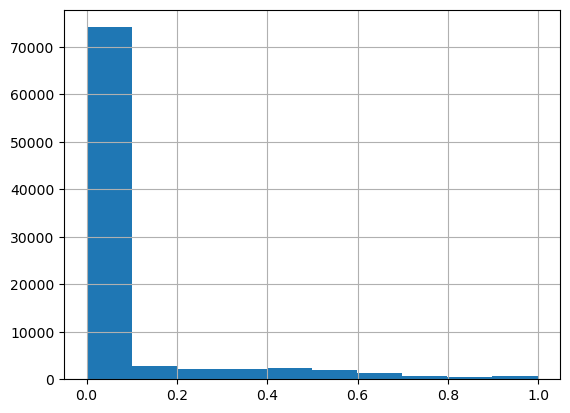

In [213]:
good_new_train['predicted_error'] = (good_new_train['is_callcenter'] - good_new_train['predicted']).abs()
good_new_train['predicted_error'].hist()

In [214]:
params = {
    'iterations': 697,
    'learning_rate': 0.12004667398303634,
    'depth': 6,
    'l2_leaf_reg': 96.051581694114,
    'bootstrap_type': 'No',
    'grow_policy': 'Depthwise',
    'min_data_in_leaf': 27,
    'auto_class_weights': 'Balanced',
    'cat_features': cat_features,
}

good_model = CatBoostClassifier(**params)

good_model.fit(
    good_train[good_new_train['predicted_error'] < 0.8], 
    good_y[good_new_train['predicted_error'] < 0.8], 
    cat_features=cat_features,
    verbose=False,
)

new_test.loc[ids, 'is_callcenter'] = good_model.predict_proba(good_test[num_features + cat_features])[:, 1]

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [215]:
new_test[['order_id', 'is_callcenter']].to_csv('sub_2models_opt.csv', index=None)

## Optuna

In [93]:
good_X_train, good_X_test, good_y_train, good_y_test = train_test_split(
    good_train[num_features + cat_features], 
    good_y,
    train_size=0.7,
    random_state=17,
    shuffle=True
)

In [95]:
bad_X_train, bad_X_test, bad_y_train, bad_y_test = train_test_split(
    bad_train[bad_num_features + bad_cat_features], 
    bad_y,
    train_size=0.7,
    random_state=17,
    shuffle=True
)

In [96]:
from functools import partial
import optuna

In [97]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    params = {
        'iterations': 800,
        'learning_rate': trial.suggest_float('learning_rate', 2e-4, 2e-1, log=True),
        'depth': 8,
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
        'loss_function': 'Logloss'
    }

    model = CatBoostClassifier(**params)

    model.fit(
        X_train, 
        y_train, 
        cat_features=cat_features,
        verbose=False,
    )

    y_pred = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred)

objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=good_X_train, 
    y_train=good_y_train, 
    X_test=good_X_test,
    y_test=good_y_test,
    cat_features=cat_features
)

In [98]:
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='maximize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=50,
    timeout=None,
)

[I 2023-03-18 22:49:37,305] A new study created in memory with name: no-name-a071bb0a-2054-4682-8838-fe8351415f52
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
[I 2023-03-18 22:50:10,374] Trial 0 finished with value: 0.9872472552620888 and parameters: {'learning_rate': 0.008189747428041634}. Best is trial 0 with value: 0.9872472552620888.
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
[I 2023-03-18 22:50:42,903] Trial 1 finished with value: 0.9858648823937234 and parameters: {'learning_rate': 0.003

In [99]:
optuna.visualization.plot_slice(study)

In [100]:
study.best_trial

FrozenTrial(number=17, state=TrialState.COMPLETE, values=[0.9883535416993585], datetime_start=datetime.datetime(2023, 3, 18, 22, 58, 47, 672916), datetime_complete=datetime.datetime(2023, 3, 18, 22, 59, 21, 627775), params={'learning_rate': 0.03692428255887797}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.2, log=True, low=0.0002, step=None)}, trial_id=17, value=None)

In [102]:
import dill
dill.dump_session('catboost_lr_optuned.db')

In [ ]:
import dill
dill.load_session('catboost_lr_optuned.db')

In [103]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.02, 0.2),
        'depth': trial.suggest_int('depth', 5, 12),
        # 'loss_function': trial.suggest_categorical('loss_func', ['Logloss', 'CrossEntropy']),
        'l2_leaf_reg': trial.suggest_float('l2_reg', 0, 100),
        # 'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS', 'Poisson', 'No']),
        # 'grow_policy': trial.suggest_categorica('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        # 'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 1000),
        'auto_class_weights': trial.suggest_categorical('class_weights', [None, 'Balanced', 'SqrtBalanced']),
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
    }

    model = CatBoostClassifier(**params)

    model.fit(
        X_train, 
        y_train, 
        cat_features=cat_features,
        verbose=False,
    )

    y_pred = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred)

objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=good_X_train, 
    y_train=good_y_train, 
    X_test=good_X_test,
    y_test=good_y_test,
    cat_features=cat_features
)

In [104]:
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='maximize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=60,
    timeout=None,
)

[I 2023-03-18 23:19:27,728] A new study created in memory with name: no-name-21491ee1-9802-46a1-8678-02728a70ffc8
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

[I 2023-03-18 23:19:51,085] Trial 0 finished with value: 0.9878617404103677 and parameters: {'iterations': 769, 'learning_rate': 0.19359751455420757, 'depth': 7, 'l2_reg': 91.48023303520829, 'class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.9878617404103677.
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

[I 2023-03-18 23:20:38,450] Trial 1 finished with value: 0.9880847868502717 and parameters: {'iterations': 843, 'learning_rate': 0.026560340061253847, 'depth': 9, 'l2_reg': 35.52094179315796, 'class_weights': 'SqrtBalanced'}. Best is trial 1 with value: 0.988

In [105]:
optuna.visualization.plot_slice(study)

In [109]:
study.best_trial

FrozenTrial(number=52, state=TrialState.COMPLETE, values=[0.9883529995319493], datetime_start=datetime.datetime(2023, 3, 18, 23, 54, 13, 765313), datetime_complete=datetime.datetime(2023, 3, 18, 23, 54, 30, 722846), params={'iterations': 687, 'learning_rate': 0.12004667398303634, 'depth': 6, 'l2_reg': 96.051581694114, 'class_weights': 'Balanced'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=1000, log=False, low=500, step=1), 'learning_rate': FloatDistribution(high=0.2, log=False, low=0.02, step=None), 'depth': IntDistribution(high=12, log=False, low=5, step=1), 'l2_reg': FloatDistribution(high=100.0, log=False, low=0.0, step=None), 'class_weights': CategoricalDistribution(choices=(None, 'Balanced', 'SqrtBalanced'))}, trial_id=52, value=None)

In [106]:
dill.dump_session('catboost_first_features_optuned.db')

In [ ]:
import dill
dill.load_session('catboost_first_features_optuned.db')

In [112]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    params = {
        'iterations': 687,
        'learning_rate': 0.12004667398303634,
        'depth': 6,
        'l2_leaf_reg': 96.051581694114,
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'Poisson', 'No']),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
        'auto_class_weights': 'Balanced',
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
    }
    
    model = CatBoostClassifier(**params)

    model.fit(
        X_train, 
        y_train, 
        cat_features=cat_features,
        verbose=False,
    )

    y_pred = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred)

objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=good_X_train, 
    y_train=good_y_train, 
    X_test=good_X_test,
    y_test=good_y_test,
    cat_features=cat_features
)

In [113]:
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='maximize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=60,
    timeout=None,
)

[I 2023-03-19 00:00:09,729] A new study created in memory with name: no-name-722ff9ab-f333-4618-ab5d-c8d22570fe86
[I 2023-03-19 00:00:26,121] Trial 0 finished with value: 0.988230697654245 and parameters: {'bootstrap_type': 'Bayesian', 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 189}. Best is trial 0 with value: 0.988230697654245.
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

[I 2023-03-19 00:00:42,411] Trial 1 finished with value: 0.9886500025352487 and parameters: {'bootstrap_type': 'No', 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 210}. Best is trial 1 with value: 0.9886500025352487.
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

[I 2023-03-19 00:00:49,625] Trial 2 finished with value: 0.9882006874559528 and pa

In [114]:
optuna.visualization.plot_slice(study)

In [115]:
study.best_params

{'bootstrap_type': 'No', 'grow_policy': 'Depthwise', 'min_data_in_leaf': 27}

In [116]:
dill.dump_session('catboost_fully_optuned.db')

In [117]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):
    params = {
        'iterations': 800,
        'learning_rate': trial.suggest_float('learning_rate', 2e-4, 2e-1, log=True),
        'depth': 8,
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
        'loss_function': 'Logloss'
    }

    model = CatBoostClassifier(**params)

    model.fit(
        X_train, 
        y_train, 
        cat_features=cat_features,
        verbose=False,
    )

    y_pred = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred)

objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=bad_X_train, 
    y_train=bad_y_train, 
    X_test=bad_X_test,
    y_test=bad_y_test,
    cat_features=bad_cat_features
)

In [118]:
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='maximize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=50,
    timeout=None,
)

[I 2023-03-19 00:09:30,425] A new study created in memory with name: no-name-7431350b-4066-4622-ae5a-8a93c53592f5
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

[I 2023-03-19 00:10:41,377] Trial 0 finished with value: 0.649587570726869 and parameters: {'learning_rate': 0.005256680949607037}. Best is trial 0 with value: 0.649587570726869.
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

[I 2023-03-19 00:11:55,735] Trial 1 finished with value: 0.6387085170735575 and parameters: {'learning_rate': 0.00023886858427075888}. Best is trial 0 with value: 0.649587570726869.
/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items inst

In [121]:
optuna.visualization.plot_slice(study)

In [122]:
study.best_trial

FrozenTrial(number=33, state=TrialState.COMPLETE, values=[0.6565869947289584], datetime_start=datetime.datetime(2023, 3, 19, 0, 50, 28, 535281), datetime_complete=datetime.datetime(2023, 3, 19, 0, 51, 44, 851216), params={'learning_rate': 0.011964712238543711}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.2, log=True, low=0.0002, step=None)}, trial_id=33, value=None)

In [120]:
import dill
dill.dump_session('bad_catboost_lr_optuned.db')

In [ ]:
import dill
dill.load_session('catboost_lr_optuned.db')

In [ ]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.02, 0.2),
        'depth': trial.suggest_int('depth', 5, 12),
        # 'loss_function': trial.suggest_categorical('loss_func', ['Logloss', 'CrossEntropy']),
        'l2_leaf_reg': trial.suggest_float('l2_reg', 0, 100),
        # 'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS', 'Poisson', 'No']),
        # 'grow_policy': trial.suggest_categorica('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        # 'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 1000),
        'auto_class_weights': trial.suggest_categorical('class_weights', [None, 'Balanced', 'SqrtBalanced']),
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
    }

    model = CatBoostClassifier(**params)

    model.fit(
        X_train, 
        y_train, 
        cat_features=cat_features,
        verbose=False,
    )

    y_pred = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred)

objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=good_X_train, 
    y_train=good_y_train, 
    X_test=good_X_test,
    y_test=good_y_test,
    cat_features=cat_features
)
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='maximize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=60,
    timeout=None,
)
optuna.visualization.plot_slice(study)
study.best_trial
dill.dump_session('catboost_first_features_optuned.db')
import dill
dill.load_session('catboost_first_features_optuned.db')
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    params = {
        'iterations': 687,
        'learning_rate': 0.12004667398303634,
        'depth': 6,
        'l2_leaf_reg': 96.051581694114,
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'Poisson', 'No']),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
        'auto_class_weights': 'Balanced',
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
    }
    
    model = CatBoostClassifier(**params)

    model.fit(
        X_train, 
        y_train, 
        cat_features=cat_features,
        verbose=False,
    )

    y_pred = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred)

objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=good_X_train, 
    y_train=good_y_train, 
    X_test=good_X_test,
    y_test=good_y_test,
    cat_features=cat_features
)
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='maximize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=60,
    timeout=None,
)
optuna.visualization.plot_slice(study)
study.best_params
dill.dump_session('catboost_fully_optuned.db')

## Final test

In [ ]:
params = { 
    'iterations': 696,
    'learning_rate': 0.09140720655978472,
    'depth': 7,
    'l2_leaf_reg': 38.61366529620962,
    'class_weights': None,
    'task_type': 'GPU',
    'devices': '0:1',
    'cat_features': cat_features,
}

model = CatBoostClassifier(**params)
model.fit(X_train, y_train, verbose=False)
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

In [ ]:
feature_importance = model.get_feature_importance()
argsort = np.argsort(feature_importance)[::-1]
feature_importance = feature_importance[argsort]
columns = X_train.columns[argsort]

plt.bar(height=feature_importance, x=columns)
plt.xticks(rotation=90)
plt.show()

In [ ]:
params = { 
    'iterations': 696,
    'learning_rate': 0.09140720655978472,
    'depth': 7,
    'l2_leaf_reg': 38.61366529620962,
    'class_weights': None,
    'task_type': 'GPU',
    'devices': '0:1',
    'cat_features': cat_features,
    'ignored_features': [
            'session_product_in_sale', 
            'is_moderated',
            'model_id',
        ]
}

model = CatBoostClassifier(**params)
model.fit(X_train, y_train, verbose=False)
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

In [ ]:
feature_importance = model.get_feature_importance()
argsort = np.argsort(feature_importance)[::-1]
feature_importance = feature_importance[argsort]
columns = X_train.columns[argsort]

plt.bar(height=feature_importance, x=columns)
plt.xticks(rotation=90)
plt.show()

In [ ]:
params = {
    'iterations': 700,
    'learning_rate': 0.12,
    'depth': 6,
    'l2_leaf_reg': 24,
    'loss_function': 'CrossEntropy',
    'bootstrap_type': 'No',
    'grow_policy': 'SymmetricTree',
    'min_data_in_leaf': 238,
    'cat_features': cat_features,
}

model = CatBoostClassifier(**params)
model.fit(X_train, y_train, verbose=False)
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

# Predict

In [51]:
test_df = pd.read_csv('test.csv')
new_test = engineering(test_df, sessions_df)

In [52]:
new_train_model = new_train[num_features + cat_features].copy()
y_train_model = new_train['is_callcenter']

new_test_model = new_test[num_features + cat_features].copy()

NameError: name 'num_features' is not defined

In [ ]:
num_imputer = SimpleImputer(strategy='median')
new_train_model[num_features] = num_imputer.fit_transform(new_train_model[num_features])
new_test_model[num_features] = num_imputer.transform(new_test_model[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
new_train_model[cat_features] = cat_imputer.fit_transform(new_train_model[cat_features])
new_test_model[cat_features] = cat_imputer.transform(new_test_model[cat_features])

new_train_model[cat_features] = new_train_model[cat_features].astype(int)
new_test_model[cat_features] = new_test_model[cat_features].astype(int)

In [ ]:
params = {
    'iterations': 700,
    'learning_rate': 0.12,
    'depth': 6,
    'l2_leaf_reg': 24,
    'loss_function': 'CrossEntropy',
    'bootstrap_type': 'No',
    'grow_policy': 'SymmetricTree',
    'min_data_in_leaf': 238,
    'cat_features': cat_features,
}

model = CatBoostClassifier(**params)
model.fit(new_train_model, y_train_model, verbose=False)

In [ ]:
y_pred_test = model.predict_proba(new_test_model)[:, 1]
new_test['is_callcenter'] = y_pred_test

In [ ]:
new_test[['order_id', 'is_callcenter']].to_csv('sub2_mod.csv', index=None)